In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

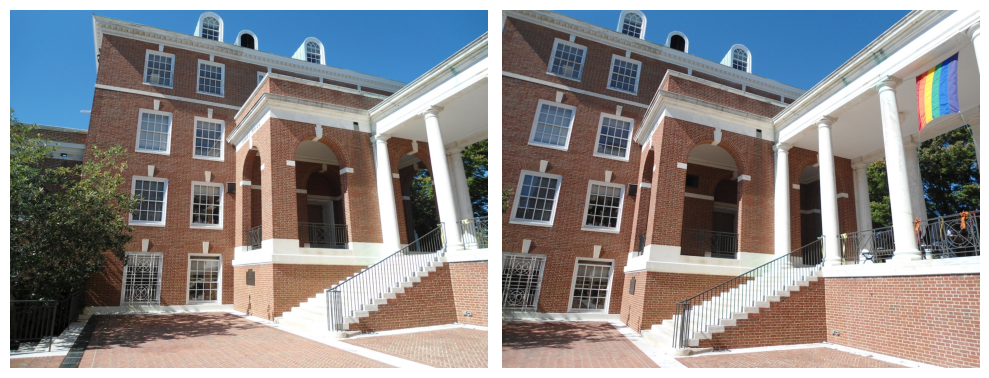

In [39]:
image_ames1 = cv2.imread('./ames1.JPG')
image_ames1 = cv2.cvtColor(image_ames1, cv2.COLOR_BGR2RGB)

image_ames2 = cv2.imread('./ames2.JPG')
image_ames2 = cv2.cvtColor(image_ames2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image_ames1)
plt.axis('off')
plt.subplot(122)
plt.imshow(image_ames2)
plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
import cv2
import numpy as np

# Tạo một ma trận nhỏ 5x5 làm ví dụ
matrix = np.array([
    [10, 20, 30, 40, 50],
    [15, 25, 35, 45, 55],
    [20, 30, 40, 50, 60],
    [25, 35, 45, 55, 65],
    [30, 40, 50, 60, 70]
], dtype=np.uint8)  # Chuyển sang kiểu dữ liệu uint8 (ảnh grayscale)

# In ra ma trận ban đầu
print("Ma trận ban đầu:")
print(matrix)

# Tính toán gradient theo hướng x và y
Ix = cv2.Sobel(matrix, cv2.CV_64F, 1, 0, ksize=3)  # Đạo hàm theo hướng x
Iy = cv2.Sobel(matrix, cv2.CV_64F, 0, 1, ksize=3)  # Đạo hàm theo hướng y

# In ra gradient theo hướng x và y
print("\nGradient theo hướng x:")
print(Ix)

print("\nGradient theo hướng y:")
print(Iy)


Ma trận ban đầu:
[[10 20 30 40 50]
 [15 25 35 45 55]
 [20 30 40 50 60]
 [25 35 45 55 65]
 [30 40 50 60 70]]

Gradient theo hướng x:
[[ 0. 80. 80. 80.  0.]
 [ 0. 80. 80. 80.  0.]
 [ 0. 80. 80. 80.  0.]
 [ 0. 80. 80. 80.  0.]
 [ 0. 80. 80. 80.  0.]]

Gradient theo hướng y:
[[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]]


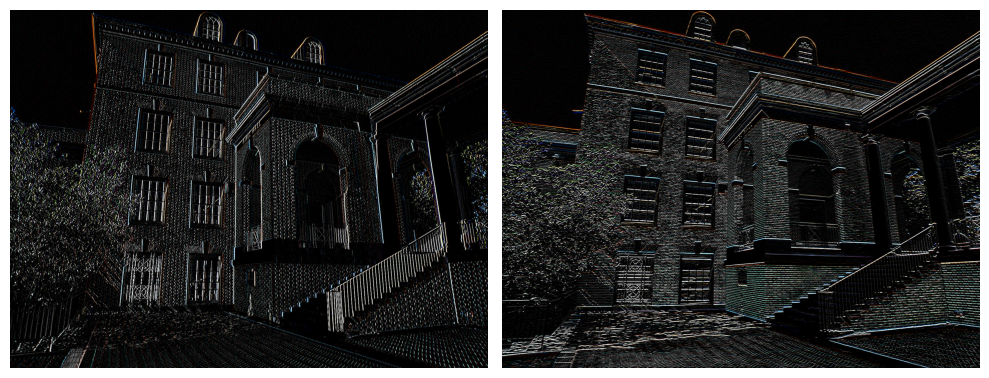

In [24]:
# Compute gradients in x and y directions using Sobel operator
Ix = cv2.Sobel(image_ames1, -1, 1, 0, ksize=3)  # Compute derivative in x-direction
Iy = cv2.Sobel(image_ames1, -1, 0, 1, ksize=3)  # Compute derivative in y-direction
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(Ix)
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy)
plt.axis('off')
plt.tight_layout()
plt.show()

In [51]:
def corners(image, w, kappa):
    # a.
    image_blurred = cv2.GaussianBlur(image, (w, w), 3)
    Ix = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=3)  # Compute derivative in x-direction
    Iy = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=3)  # Compute derivative in y-direction
    
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    Ixx_ = cv2.GaussianBlur(Ixx, (w, w), 0)
    Iyy_ = cv2.GaussianBlur(Iyy, (w, w), 0)
    Ixy_ = cv2.GaussianBlur(Ixy, (w, w), 0)

    det_matrix = Ixx_ * Iyy_ - Ixy_ * Ixy_
    trace_matrix = Ixx_ + Iyy_

    K = np.divide(det_matrix, trace_matrix, where=trace_matrix != 0)

    K = K / np.max(K)

    H = K > kappa
    
    keypoint = []
    border_size = w // 2
    
    for i in range(border_size, image.shape[0] - border_size):
        for j in range(border_size, image.shape[1] - border_size):
            k_patch = K[(i - border_size):(i + border_size + 1), (i - border_size):(i - border_size + 1)]
            if H[i, j] and K[i, j] == np.max(k_patch):
                keypoint.append((i, j))
    
    return keypoint
    

    # # Tạo bộ lọc Gauss 1D
    # gaussian_kernel = cv2.getGaussianKernel(3, 1)
    # # Tạo bộ lọc Gauss 2D từ bộ lọc Gauss 1D
    # gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel.T)
    

In [52]:
ames1_gray = cv2.cvtColor(image_ames1, cv2.COLOR_RGB2GRAY)
keypoint_coords = corners(ames1_gray, 5, 0.1)

In [53]:
keypoint_coords

[(683, 681),
 (686, 684),
 (775, 773),
 (779, 777),
 (780, 778),
 (782, 780),
 (874, 872),
 (879, 877),
 (884, 882),
 (943, 941)]

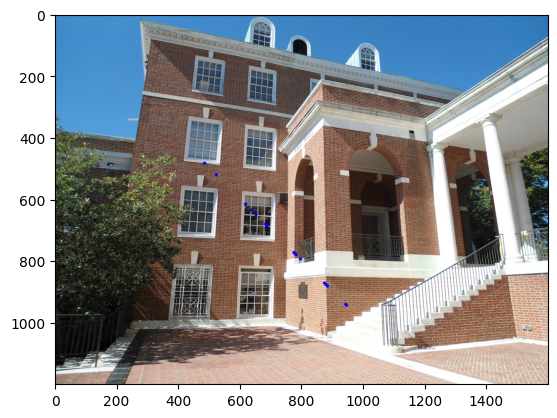

In [54]:
# Vẽ mỗi điểm lên ảnh
for point in keypoint_coords:
    cv2.circle(image_ames1, point, 5, (0, 0, 255), -1)  # Vẽ điểm có bán kính 5, màu đỏ (0, 0, 255)

plt.imshow(image_ames1)